In [16]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings as warning
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.metrics import ConfusionMatrixDisplay

In [17]:
# Load data and drop unnecessary columns and rows with null values

data = pd.read_csv('data/song_data.csv').drop(columns=['track_id', 'key', 'number', 'album_name', 'track_name','track_genre','artists']).dropna(how='any')

# data = data[data['popularity'] > 60]
data['popularity'] = data['popularity'].apply(lambda x: 1 if x > 60 else 0)
# Convert True to 1 and False to 0 in the "popularity" column
data['explicit'] = data['explicit'].astype(int)
# # Assuming 'popularity' column contains numerical values
# data['popularity'] = data['popularity'].apply(lambda x: 1 if x > 60 else 0)
# # Convert True to 1 and False to 0 in the "popularity" column
# data['explicit'] = data['explicit'].astype(int)

target = data['popularity']

# # Create a DataFrame for the features (excluding the 'popularity' column)
# features = data.drop(columns=['popularity'])

# Reshape the data to long format
long_data = pd.melt(data, id_vars=['popularity'], var_name='feature', value_name='value')

# Calculate the mean for each feature and popularity
#means = long_data.groupby(['feature', 'popularity'])['value'].mean().reset_index()

# Reshape the data back to wide format
#wide_means = means.pivot(index='feature', columns='popularity', values='value')



In [18]:
data.head()

,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1,230666,0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,0,149610,0,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,0,210826,0,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,1,201933,0,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,1,198853,0,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


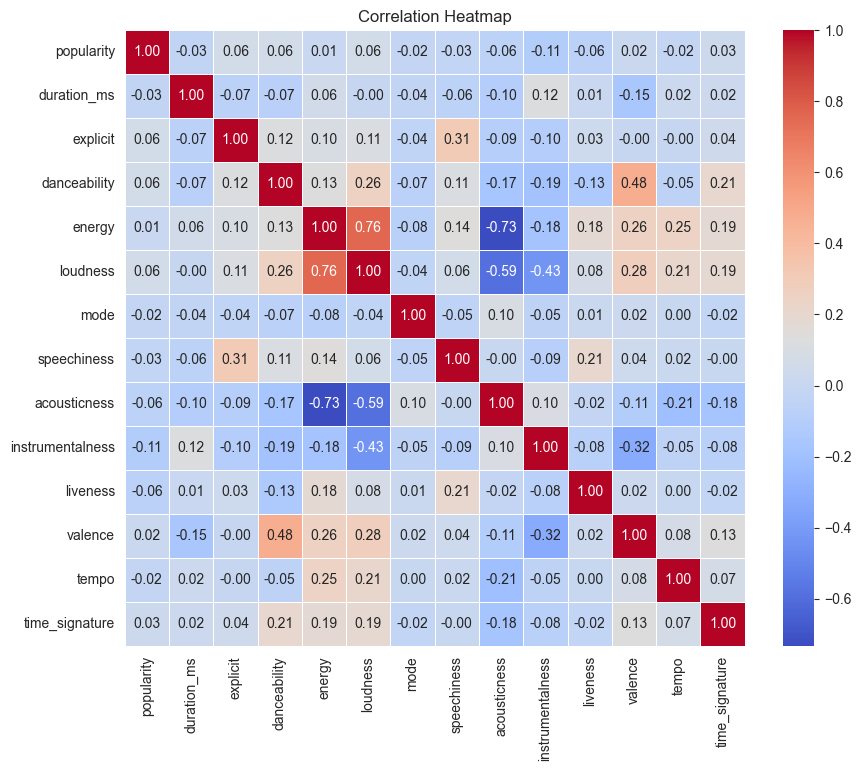

In [19]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
# # Group by genre and calculate mean popularity
# genre_popularity = data.groupby('track_genre')['popularity'].mean().reset_index()
# 
# # Sort genres by popularity
# sorted_genres = genre_popularity.sort_values(by='popularity', ascending=False)['track_genre']
# 
# plt.figure(figsize=(12, 8))
# plt.bar(x=genre_popularity['track_genre'], height=genre_popularity['popularity'], color='blue')
# 
# plt.xlabel('Genre')
# plt.ylabel('Mean Popularity')
# plt.title('Mean Popularity of Popular Songs by Genre')
# plt.xticks(rotation=90)
# plt.tight_layout()
# 
# plt.show()

Why? I need to normalize the date because it was too noisy and imbalance. it made it easier to train the KNN model with this data. The graph it there to help me find the best K value to use for KNN Model. it repreatse the KNN modea 10 time and show me the accuracy for both train and test so I can choose the best KNN. And base on the result It's 4.  

In [28]:

# Assuming cleared_data contains your DataFrame with 'popularity' as the target variable
# Separate the features and target variable
X = data.drop(columns=['popularity'])
y = data['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3870)

# Standardize the features by scaling them
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn_classifier1 = KNeighborsClassifier(n_neighbors=4)

# Train the classifier on the training data
knn_classifier1.fit(X_train_scaled, y_train)

# Predict the target variable for the test data
y_pred = knn_classifier1.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy1 = accuracy_score(y_test, y_pred)
print("Normalize Accuracy:", accuracy1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Normalize Accuracy: 0.8868859649122807
Confusion Matrix:
[[19641   470]
 [ 2109   580]]


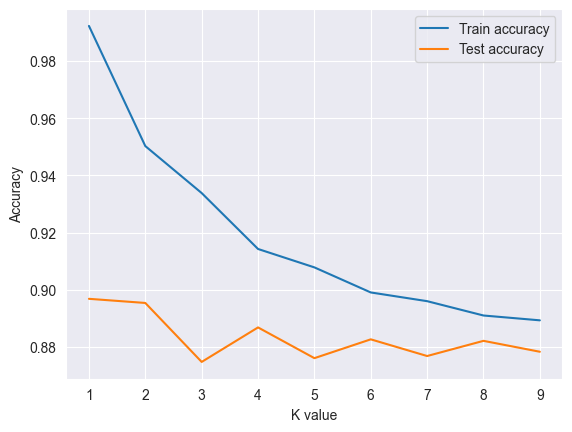

In [21]:
# Range of k values to try
warning.filterwarnings('ignore')
k_values = range(1, 10)

# Dictionary to store mean accuracy scores for each k

train_accuracies = []
test_accuracies = []

# Iterate over each k value
for k in k_values:
    # Create a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_accuracies.append(knn.score(X_train_scaled, y_train))
    test_accuracies.append(knn.score(X_test_scaled, y_test))


# Plotting the results
plt.plot(k_values, train_accuracies, label='Train accuracy')
plt.plot(k_values, test_accuracies, label='Test accuracy')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

When predicting a popularity there are multiply variables that needed to consider so I used the tree model to predict the target variable. Both the tree models have pretty accuracy rate compare to KKN.  Also it show the number need to each variable for a song to be consider popular with 0 entropy. 

In [32]:
# Create and train the Decision Tree model
tree = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=3780)
tree.fit(X_train, y_train)

# Create and train the Random Forest model
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=3780)
forest.fit(X_train, y_train)

# Evaluate the models
print("Forest Accuracy:", forest.score(X_test, y_test))  # Use X_test and y_test here
print("Tree Accuracy:", tree.score(X_test, y_test))  # Use X_test and y_test here

Forest Accuracy: 0.9315350877192983
Tree Accuracy: 0.8820614035087719


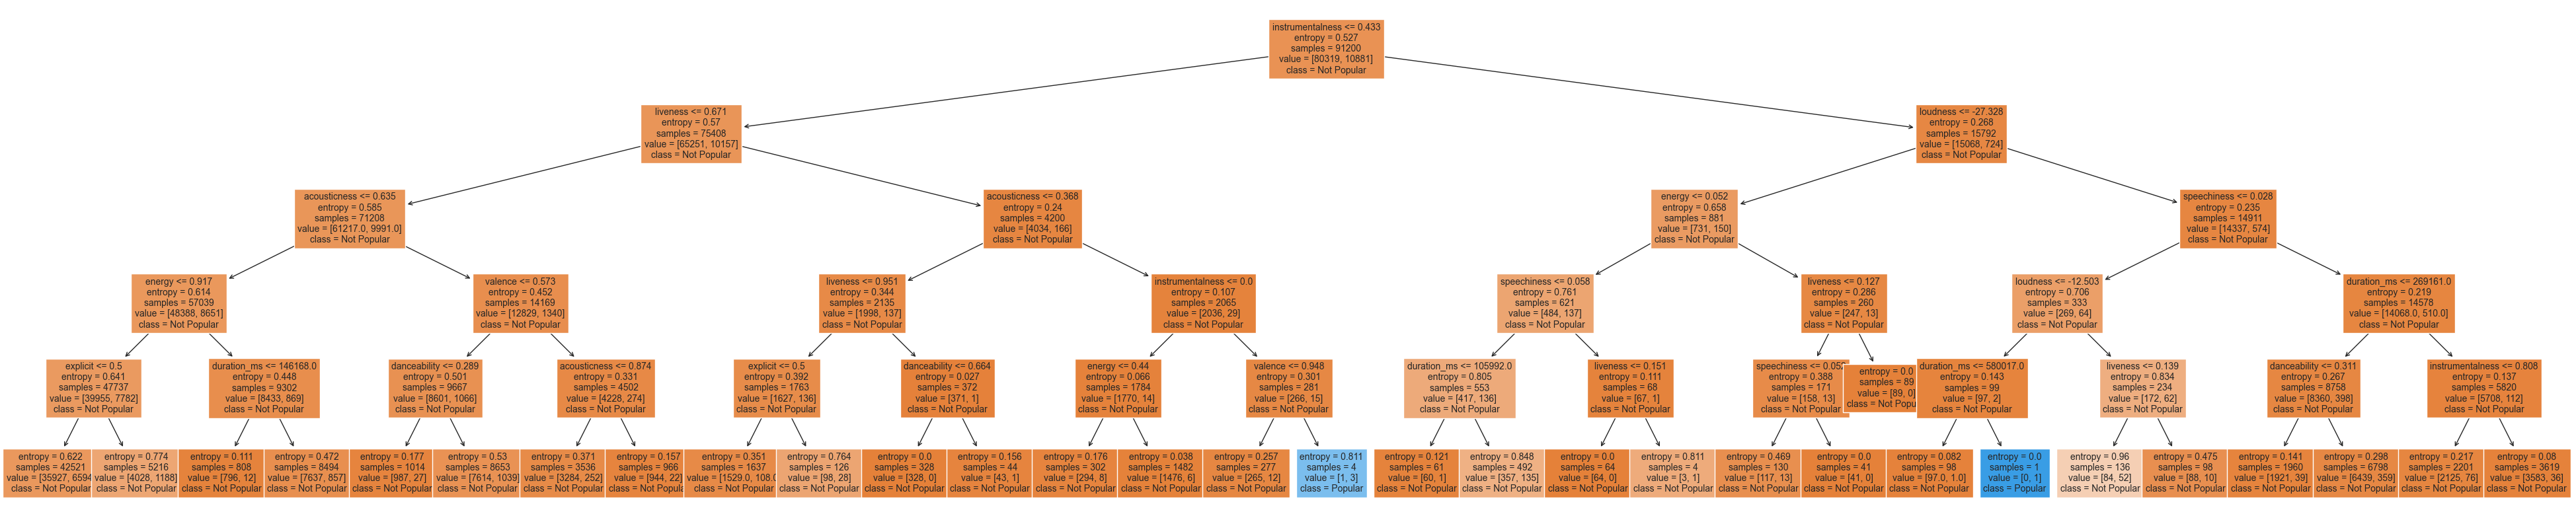

In [33]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(50,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Not Popular', 'Popular'], fontsize=10)
plt.show()

As the subpart of our hypothesis, we wanted to know which variable was important in determining the popularity of a song. So Given the forest modal has the higest accuracy. we decided to look into what features were important that the algorithm use to predict the popularity. AS show by the gaphs there seems be lot of feture that determine the popularity of a song.

Accuracy: 0.9301315789473684
Feature ranking:
1. Feature 'duration_ms' (0.1029513482347874)
2. Feature 'loudness' (0.1024337647133261)
3. Feature 'valence' (0.10219612495541923)
4. Feature 'speechiness' (0.09887674539466948)
5. Feature 'tempo' (0.09864187388936804)
6. Feature 'energy' (0.09802996033671452)
7. Feature 'acousticness' (0.09740996806901123)
8. Feature 'liveness' (0.09625845941385161)
9. Feature 'danceability' (0.09442987338978759)
10. Feature 'instrumentalness' (0.0821397381017673)
11. Feature 'mode' (0.012037350515205733)
12. Feature 'explicit' (0.007763394117491673)
13. Feature 'time_signature' (0.006831398868600088)


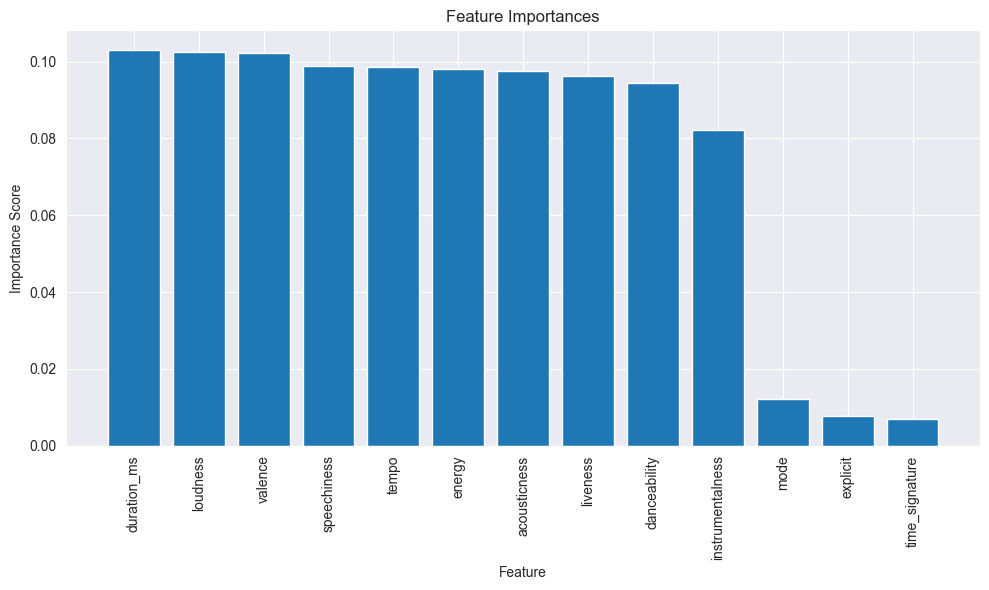

In [34]:
import numpy as np

# Train the Random Forest classifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
forest.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = forest.score(X_test, y_test)
print("Accuracy:", accuracy)


# # Predict the labels for the test data
# y_pred = forest.predict(X_test_scaled)
# 
# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)
# 
# # Calculate additional metrics if needed
# # For example, you can calculate accuracy using accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)



# Get feature importances
importances = forest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train_scaled.shape[1]):
    feature_index = indices[f]
    feature_name = X_train.columns[feature_index]
    print(f"{f + 1}. Feature '{feature_name}' ({importances[feature_index]})")


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_scaled.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
'''THIS DOES NOT WORK DON"T TRY RUNNING THIS IT WILL JUST SLOW YOU DOWN'''

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


# Finding average accuracy values of each model, comparing the models
accuracies_linear = []
accuracies_sgd = []
accuracies_poly = []
accuracies_sigmoid = []
accuracies_rbf = []

# Create SVM classifier with soft-margin (C=1)
# Measure differences in SVM Accuracy by kernel
print("Creating Classifiers...")
svm_classifier_linear = SVC(kernel='linear', degree=3, C=1)
svm_classifier_sgd = SGDClassifier(max_iter=2500)
svm_classifier_poly = SVC(kernel='poly', degree=3, C=1)
svm_classifier_sigmoid = SVC(kernel='sigmoid', degree=3, C=1)
svm_classifier_rbf = SVC(degree=3, C=1)

# Process the data through each of these five models 10 times to calculate the true accuracy of the model
for _ in range(9):

    # Train the classifiers
    print("Training classifiers...")
    svm_classifier_linear.fit(X_train, y_train)
    svm_classifier_sgd.fit(X_train, y_train)
    svm_classifier_poly.fit(X_train, y_train)
    svm_classifier_sigmoid.fit(X_train, y_train)
    svm_classifier_rbf.fit(X_train, y_train)

    # Make predictions on test data
    print("Classifying unseen data based on trained classifiers...")
    y_pred_linear = svm_classifier_linear.predict(X_test)
    y_pred_sdg = svm_classifier_sgd.predict(X_test)
    y_pred_poly = svm_classifier_poly.predict(X_test)
    y_pred_sigmoid = svm_classifier_sigmoid.predict(X_test)
    y_pred_rbf = svm_classifier_rbf.predict(X_test)

    # Calculate accuracy of each model
    print("Processing the accuracy of each classifier, compared to actual data values...")
    accuracies_linear.append(accuracy_score(y_test, y_pred_linear))
    accuracies_sgd.append(accuracy_score(y_test, y_pred_sdg))
    accuracies_poly.append(accuracy_score(y_test, y_pred_poly))
    accuracies_sigmoid.append(accuracy_score(y_test, y_pred_sigmoid))
    accuracies_rbf.append(accuracy_score(y_test, y_pred_rbf))





Creating Classifiers...
Training classifiers...
Classifying unseen data based on trained classifiers...
Processing the accuracy of each classifier, compared to actual data values...
Training classifiers...
Classifying unseen data based on trained classifiers...
Processing the accuracy of each classifier, compared to actual data values...
Training classifiers...
Classifying unseen data based on trained classifiers...
Processing the accuracy of each classifier, compared to actual data values...
Training classifiers...


As SAM recomanded I was trying to underscore the forest model for better accuracy. SAM You might want to LOOK at this more. 

Decision Tree Accuracy: 0.6213583310357504


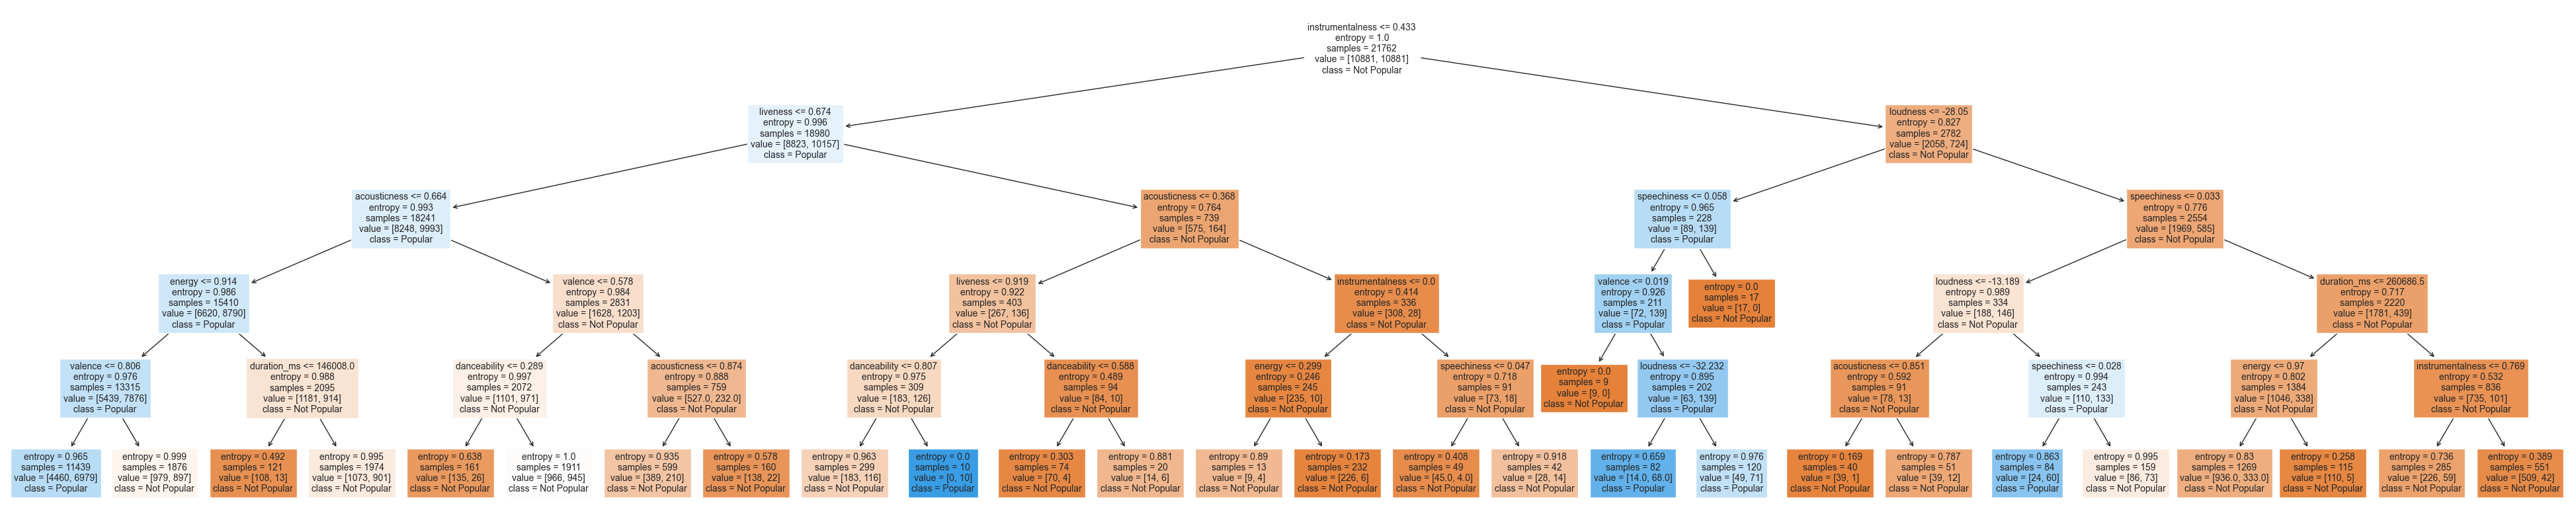

In [36]:
from sklearn.utils import resample
import numpy as np
from sklearn.tree import plot_tree

# Separate majority and minority classes
majority_class = X_train[y_train == 0]
minority_class = X_train[y_train == 1]

# Downsample the majority class to match the number of instances in the minority class
majority_downsampled = resample(majority_class, 
                                 replace=False,     # sample without replacement
                                 n_samples=len(minority_class),    # match number in minority class
                                 random_state=42)  # reproducible results

# Combine the minority class with the downsampled majority class
X_balanced = np.concatenate([majority_downsampled, minority_class])
y_balanced = np.concatenate([np.zeros(len(majority_downsampled)), np.ones(len(minority_class))])

# Train a decision tree classifier on the balanced dataset
tree.fit(X_balanced, y_balanced)

# Evaluate the model on the test set
accuracy = tree.score(X_balanced, y_balanced)
print("Decision Tree Accuracy:", accuracy)



# Plot the decision tree
plt.figure(figsize=(50,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Not Popular', 'Popular'], fontsize=10)
plt.show()
